## Task:2  Prediction using Unsupervised ML
### Iris Dataset to find Optimum number of Clusters and represent Visually

## AUTHOR: Depala Rajeswari

### Import Libraries required

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as metrics
import sklearn.cluster as cluster
%matplotlib inline

### Ignore the warnings arise

In [2]:
import warnings as wg
wg.filterwarnings("ignore")

### Import Dataset

In [3]:
irisdata = pd.read_csv("Iris.csv")
irisdata

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### Print first 5 rows of the dataset

In [4]:
irisdata.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Total number of columns and rows

In [5]:
irisdata.shape

(150, 6)

### Find wether the dataset has null values

In [6]:
irisdata.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
irisdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
irisdata.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
irisdata.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [10]:
irisdata['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Drop Species and id Columns

In [11]:
iris_df=irisdata.drop(columns=['Species','Id'])
iris_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## To Find Optimum number of  Clusters " k "
* The performance of the K-means clustering algorithm depends upon highly efficient clusters that it forms.
* Then there are various methods to find the optimal/best value of k. Two such methods are :
                        Elbow Method
                        Silhouette Method


### ELBOW  METHOD
The Elbow Method is one of the most popular methods to determine this optimal value of k.
    1. Distortion: It is calculated as the average of the squared distances from the cluster centers of the respective clusters. Typically, the Euclidean distance metric is used.
    2.Inertia: It is the sum of squared distances of samples to their closest cluster center(wcss).


In [12]:
wcss = []

clusters_range = range(1,15)
for k in clusters_range:
    km = KMeans(n_clusters = k)
    km = km.fit(iris_df)
    wcss.append(km.inertia_)

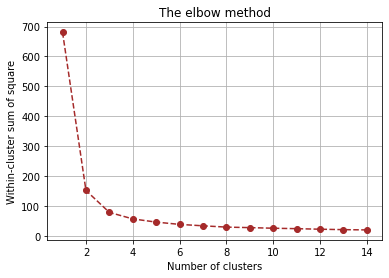

In [13]:
# Plotting the "within-cluster sum of square" against clusters range

plt.plot(clusters_range, wcss, 'go--', color='brown')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of square')
plt.grid()
plt.show()

** To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie the 
point after which the distortion/inertia start decreasing in a linear fashion. 

**  Thus for the given data, we conclude that the optimal number of clusters for the data is 3.

### Silhouette Scores
Though Silhouette Scores are not required for this dataset it is also a method to find opimum number of clusters

In [14]:
import sklearn.metrics as metrics

In [15]:
for k in range(2,10):
    labels=cluster.KMeans(n_clusters = k, init = 'k-means++', random_state = 200).fit(iris_df).labels_
    print("Silhouette Score k(clusters)  "+ str(k)+" is  "+
          str(metrics.silhouette_score(iris_df , labels,metric="euclidean",sample_size = 1000,random_state = 200)))

Silhouette Score k(clusters)  2 is  0.6808136202713507
Silhouette Score k(clusters)  3 is  0.5525919445213674
Silhouette Score k(clusters)  4 is  0.4972279726296799
Silhouette Score k(clusters)  5 is  0.48851755085386267
Silhouette Score k(clusters)  6 is  0.36650401475250544
Silhouette Score k(clusters)  7 is  0.35500051507249764
Silhouette Score k(clusters)  8 is  0.3528905239126011
Silhouette Score k(clusters)  9 is  0.34282312392107717


### CONSTRUCTING THE  MODEL

In [16]:
model = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
predictions = model.fit_predict(iris_df)

### VISUALIZING THE DATA

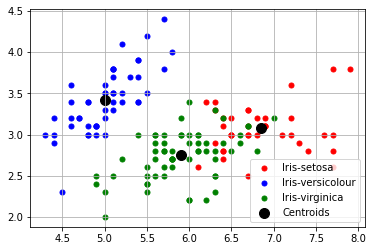

In [17]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values
plt.scatter(x[predictions == 0, 0], x[predictions == 0, 1], s = 25, c = 'red', label = 'Iris-setosa')
plt.scatter(x[predictions == 1, 0], x[predictions == 1, 1], s = 25, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[predictions == 2, 0], x[predictions == 2, 1], s = 25, c = 'green', label = 'Iris-virginica')

# Plotting the cluster centers

plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')
plt.legend()
plt.grid()
plt.show()
